## Decompose number into sum of squares

## Trivial algorithm

Returns one of the many sum of square decompositions. Favors splits from the middle of the number-ish, for prettier visuals

In [12]:
function get_squares(num, squares = []; aesthetic=false) # ; to add keyword arg
    loop_range = nothing
    part1 = 0
    if aesthetic == true
        loop_range = Iterators.reverse(1:floor(Integer, num/2))
    else 
        loop_range = Iterators.reverse(1:num-1)
    end

    if num==1
        part1=1
    else
        for i in  loop_range
            if floor(√i) == √i
                part1=i
                break
            end
        end
    end
    push!(squares, part1)
    part2 = num - part1
    if part2>0
        get_squares(part2, squares, aesthetic)
    else
        return squares
    end

end

get_squares(36)

4-element Vector{Any}:
 25
  9
  1
  1

### [todo] Better algorithm
Ideally, would give us all the sum of square decompositions

## Plot triangles from sum of squares

In [13]:
using Plots
import LinearAlgebra:norm

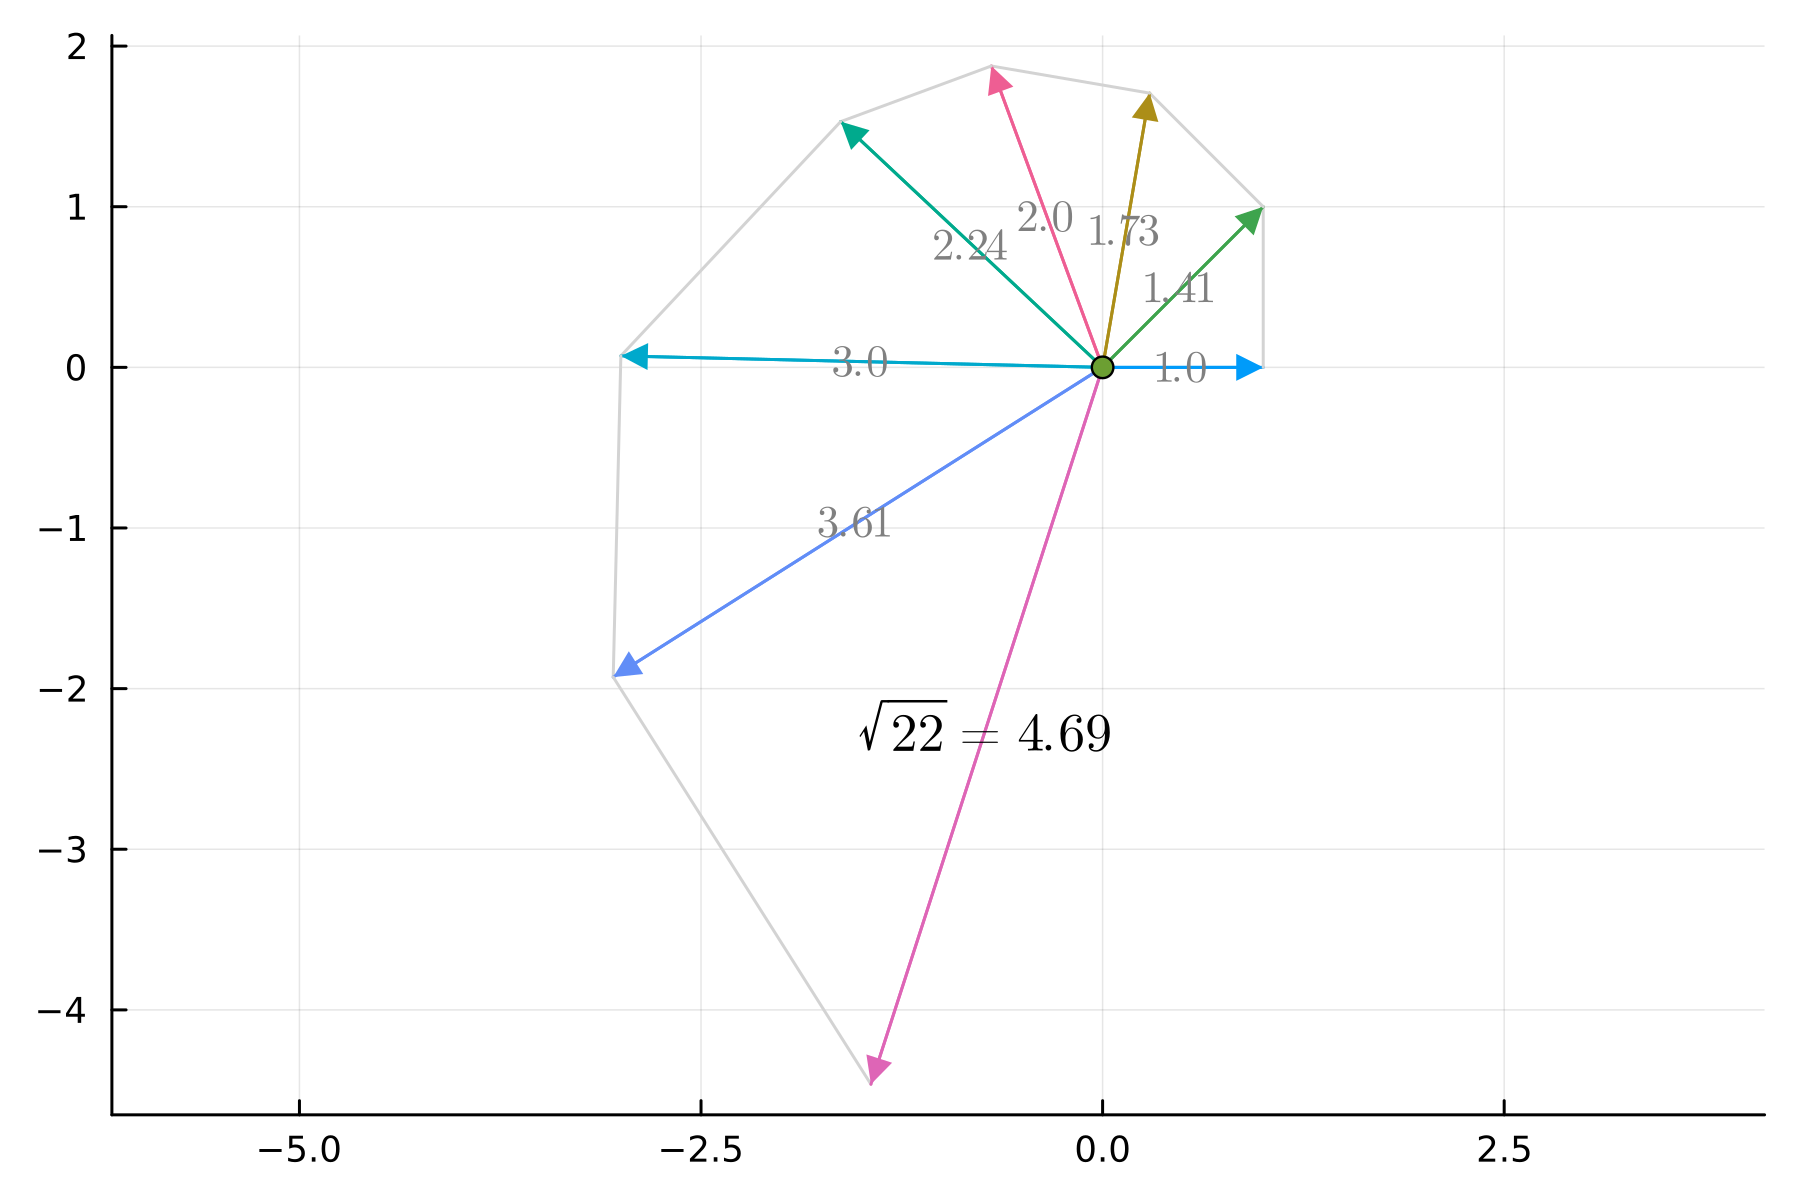

In [14]:
num_to_sqrt = 22
nums = map(√,reverse(get_squares(num_to_sqrt,aesthetic=true)))

p = plot(aspect_ratio=:equal, dpi=300)
prev_vec = 0
cur_vec = 0
for i in 1:length(nums)
    if i==1
        cur_vec = [nums[i],0]
    else
        θ = atan(nums[i]/norm(prev_vec))
        r = norm([nums[i], norm(prev_vec)])
        rot_scale_matrix = r*[cos(θ) -sin(θ); sin(θ) cos(θ)]
        cur_vec = rot_scale_matrix * (prev_vec/norm(prev_vec))
        plot!([prev_vec[1],cur_vec[1]], [prev_vec[2],cur_vec[2]], label=nothing, color="lightgrey")
    end

    # Plotting main vectors and annotation
    plot!([0,cur_vec[1]], [0,cur_vec[2]], label=nothing, arrow=(:closed), )
    color = :grey
    annotation = round(norm(cur_vec), digits=2)
    size=10
    if i==length(nums)
        color= :black
        annotation = "\$\\sqrt{$num_to_sqrt}=$annotation\$" # LaTeX annotation ;) just gotta escape the $'s
        size=12
    else
        annotation = "\$$annotation\$"
    end
    annotate!([0.5cur_vec[1]],[0.5cur_vec[2]],text(annotation,color, size))

    prev_vec = cur_vec
end

scatter!([0],[0], label=nothing)
# savefig(p, "imgs/new1.png")
p